In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_input.shape

(60000, 28, 28)

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
from keras.api._v2.keras import activations
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [ ]:
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패선 mnist 모델')

In [ ]:
model.summary()

Model: "패선 mnist 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.utils import validation
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
rufrhk = model.fit(train_scaled, train_target, epochs=5, validation_data=(val_scaled, val_target))

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5662 - accuracy: 0.8060 - val_loss: 0.4427 - val_accuracy: 0.8367
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4097 - accuracy: 0.8516 - val_loss: 0.4080 - val_accuracy: 0.8501
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3758 - accuracy: 0.8639 - val_loss: 0.3692 - val_accuracy: 0.8658
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3528 - accuracy: 0.8732 - val_loss: 0.3772 - val_accuracy: 0.8629
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3347 - accuracy: 0.8789 - val_loss: 0.3473 - val_accuracy: 0.8758


In [ ]:
print(rufrhk.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
train_scaled.shape

(48000, 784)

In [ ]:
train_target.shape

(48000,)

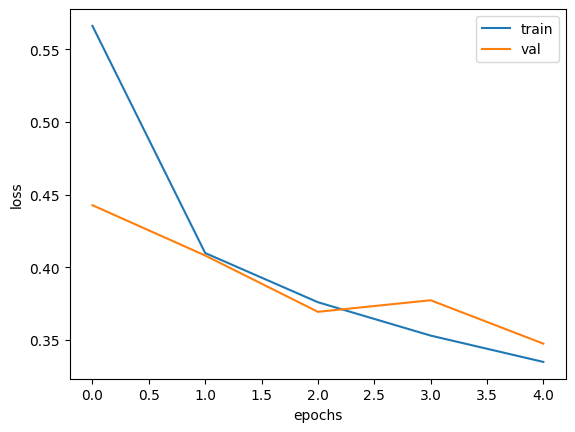

In [ ]:
import matplotlib.pyplot as plt
plt.plot(rufrhk.history['loss'])
plt.plot(rufrhk.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

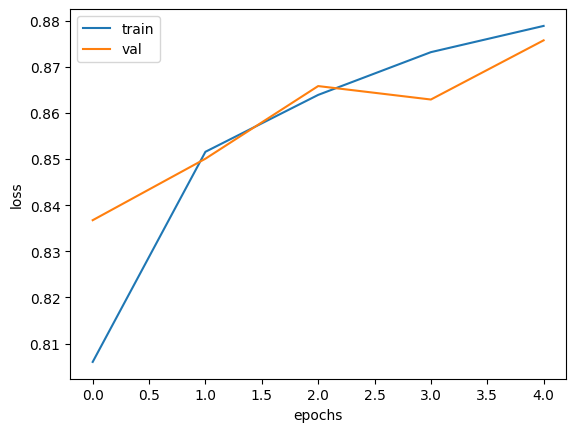

In [ ]:
plt.plot(rufrhk.history['accuracy'])
plt.plot(rufrhk.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
#model.fit(train_scaled, train_target, epochs=5)

In [ ]:
#model.evaluate(val_scaled, val_target)

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
#model.fit(train_scaled, train_target, epochs=5)

In [ ]:
#model.evaluate(val_scaled, val_target)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(32, activation='selu'))
model.add(keras.layers.Dense(64, activation='selu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, validation_data=(val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5242 - accuracy: 0.8117 - val_loss: 0.4419 - val_accuracy: 0.8427
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4011 - accuracy: 0.8539 - val_loss: 0.3763 - val_accuracy: 0.8625
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3685 - accuracy: 0.8654 - val_loss: 0.3782 - val_accuracy: 0.8625
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3458 - accuracy: 0.8719 - val_loss: 0.3531 - val_accuracy: 0.8745
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3309 - accuracy: 0.8780 - val_loss: 0.3437 - val_accuracy: 0.8739
Epoch 6/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8851 - val_loss: 0.3507 - val_accuracy: 0.8741
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3013 - accuracy: 0.8878 - val_loss: 0.3378 - val_accuracy:

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.8791


[0.3522103726863861, 0.8790833353996277]

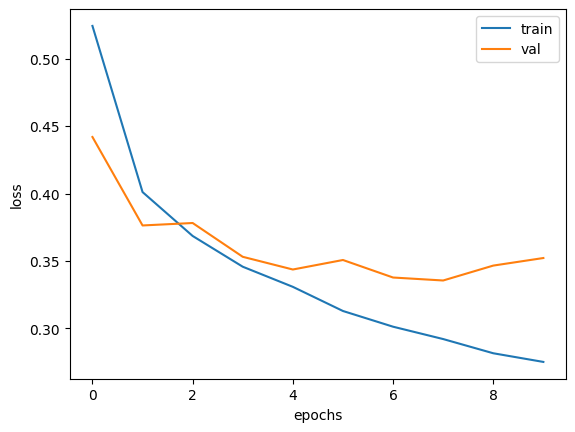

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# relu 100, 0.8780
# 300, 100, 0.8781
# 200, 100, 0.8763

In [ ]:
# elu 100, 0.8677
# 300, 100, 0.8748
# 200, 100, 0.8825

In [ ]:
# selu 100, 0.8683
# 300, 100, 0.8742
# 200, 100, 0.8764